In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns

In [2]:
# read the data
df = pd.read_csv('/content/HousePrices_HalfMil.csv')
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [4]:
# Check missing value counts
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [6]:
 df1=df.corr()
 df1

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


<Axes: >

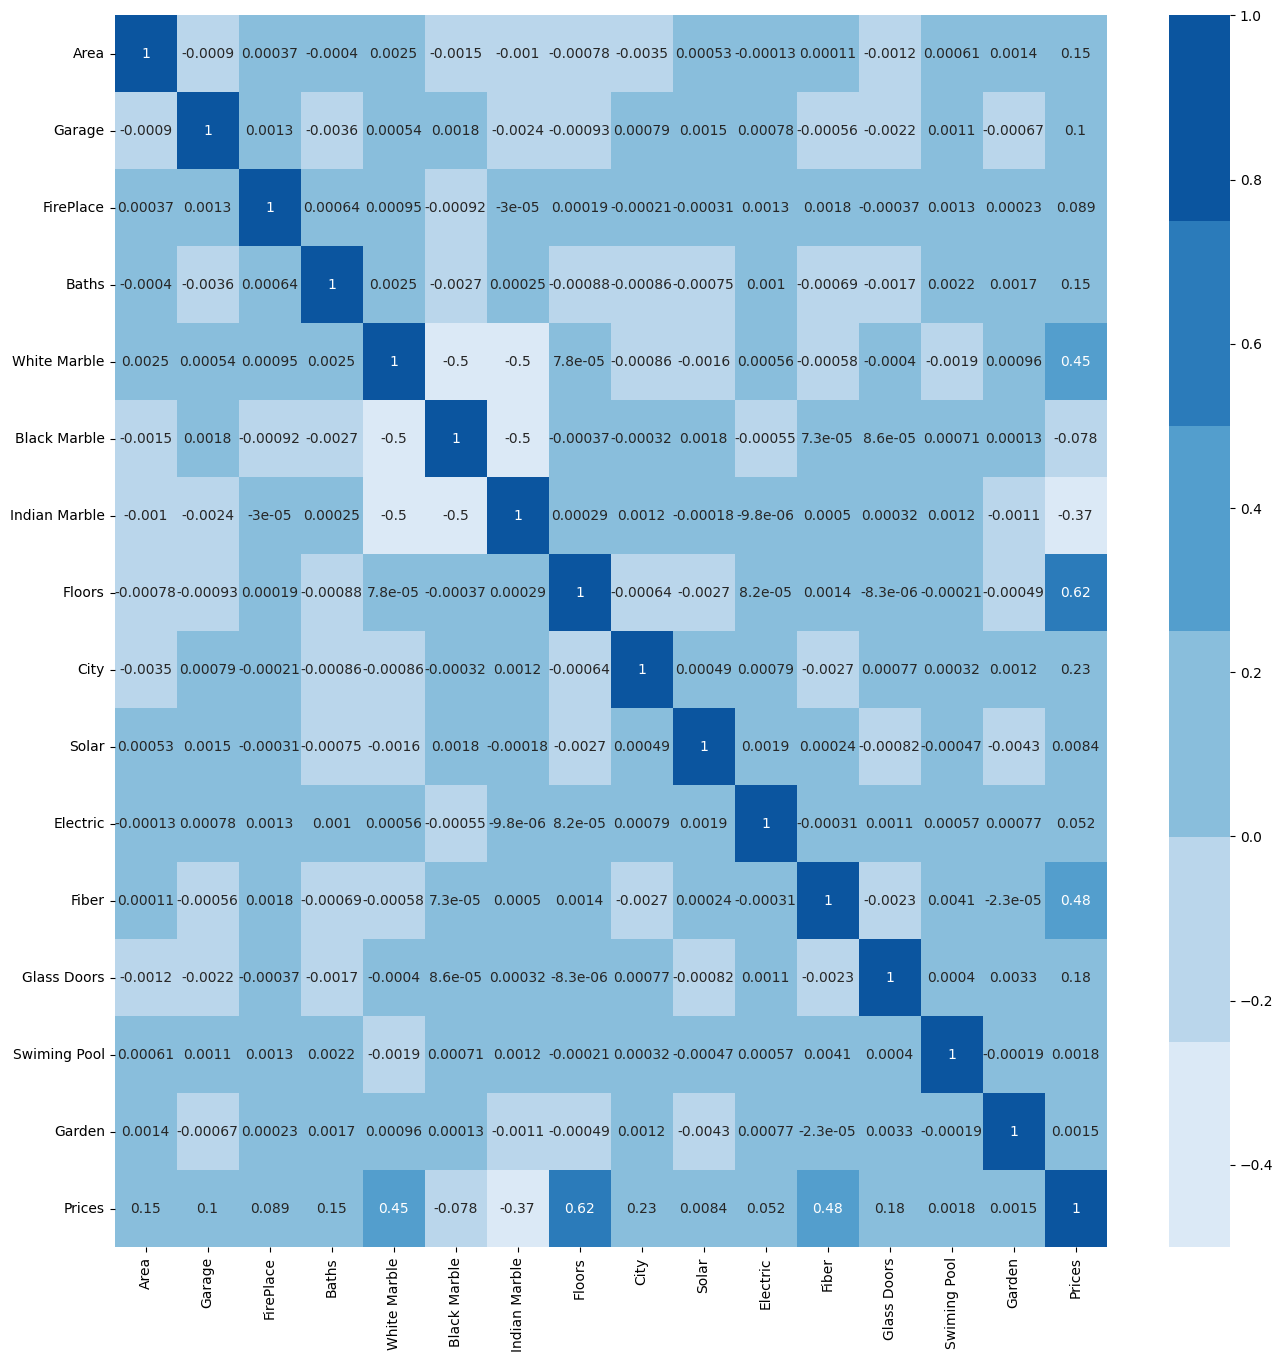

In [8]:
plt.subplots( figsize = (16,16))
sns.heatmap( df1, annot = True, cmap = sns.color_palette('Blues'))

In [11]:
X = df.drop('Prices', axis=1)
y = df['Prices']

In [13]:
X.shape

(500000, 15)

In [14]:
y.shape

(500000,)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

**Decision Tree** **Regressor**

In [17]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor1 = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [18]:
y_pred1 = regressor1.predict(X_test)

In [32]:
#Calculate the score
regressor1.score(X_test, y_test)

0.99899326336917

Random Forest **Regression**

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
#Calculate the MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#Print the results
print('Random Forest Regression:')
print('MSE:', mse)
print('MAE:', mae)

Random Forest Regression:
MSE: 81532.16608566784
MAE: 218.67016265967467


**GridSearch**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# determine the best value of the RF hyperparameter
clf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [10,20,30],
    'max_depth': [1,2,4,6,7,8,9,10],
}, cv=3, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 4, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30]})

make prediction on the dataset:

In [28]:
regressor1.predict([[190,2,4,4,1,0,0,1,3,1,1,1,1,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([73425.])

inputing the values:

In [33]:
a = int(input("What is the code of the Area?"))

What is the code of the Area?193


In [35]:
b = int(input("How many garages?"))
f = int(input("How many Fire Place?"))
c = int(input("How many bathrooms?"))
e = int(input("Does the house have White Marble?"))
d = int(input("Does the house have Black Marble?"))
e1 = int(input("Does the house have Indian marble?"))
floors = int(input("How many floors?"))
city = int(input("What is the code of the city?"))
solar = int(input("Does the house have solar?"))
Electric = int(input("Does the house have Electric?"))
Fiber = int(input("Does the house have Fiber?"))
GlassDoors = int(input("Does the house have Glass Doors?"))
SwimingPool = int(input("Does the house have Swiming Pool?"))
Garden = int(input("Does the house have Garden?"))


How many garages?1
How many Fire Place?1
How many bathrooms?3
Does the house have White Marble?0
Does the house have Black Marble?1
Does the house have Indian marble?0
How many floors?3
What is the code of the city?2
Does the house have solar?1
Does the house have Electric?1
Does the house have Fiber?1
Does the house have Glass Doors?1
Does the house have Swiming Pool?1
Does the house have Garden?1


In [36]:
regressor1.predict([[a,b,f,c,e,d,e1,floors,city,solar,Electric,Fiber ,GlassDoors,SwimingPool,Garden]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([56225.])